In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

## Simulate from Class

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

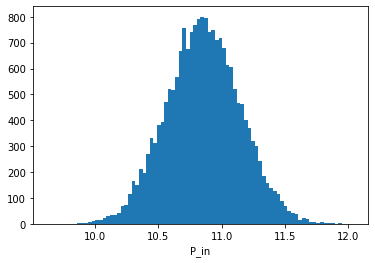

In [4]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

## Model Selection Methods

### Chi-Square

In [5]:
from helper_functions import compute_chi_square

results = compute_chi_square(simulation)

Distribution: weibull_min || Parameters: (533102816.67082655, -266555837.11416727, 266555848.05581123)
Distribution: norm || Parameters: (10.856260930361984, 0.2919045002438211)
Distribution: weibull_max || Parameters: (4.492720792453061, 12.042258498181576, 1.2981617109046732)
Distribution: beta || Parameters: (364.87933577547363, 431.3367243552041, 3.2758077228036275, 16.54157441896509)
Distribution: invgauss || Parameters: (0.01745673667969885, 8.555723145276737, 131.5246715064353)
Distribution: uniform || Parameters: (9.63191571754346, 2.4018382549794683)
Distribution: gamma || Parameters: (28532.084433159544, -38.45065752075047, 0.0017281219025688426)
Distribution: expon || Parameters: (9.63191571754346, 1.2243452128185233)
Distribution: lognorm || Parameters: (0.010872404014110125, -16.003623600716686, 26.85801472349138)
Distribution: pearson3 || Parameters: (0.011899648649981054, 10.856264999172193, 0.29190691334889135)
Distribution: triang || Parameters: (0.5134335580241474, 9.

In [6]:
results

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."
6,gamma,-3751.963996,1.0,"(28532.084433159544, -38.45065752075047, 0.001..."
9,pearson3,-3751.963993,1.0,"(0.011899648649981054, 10.856264999172193, 0.2..."
8,lognorm,-3752.687748,2.0,"(0.010872404014110125, -16.003623600716686, 26..."
2,weibull_max,-3865.628629,66.0,"(4.492720792453061, 12.042258498181576, 1.2981..."
4,invgauss,-4007.761490,226.0,"(0.01745673667969885, 8.555723145276737, 131.5..."
10,triang,-8397.600142,7079.0,"(0.5134335580241474, 9.63174489961435, 2.40218..."
0,weibull_min,-9552.834055,8581.0,"(533102816.67082655, -266555837.11416727, 2665..."
5,uniform,-17524.687675,21510.0,"(9.63191571754346, 2.4018382549794683)"


In [7]:
results_test = results.drop(results.index[3])
results_test

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."
6,gamma,-3751.963996,1.0,"(28532.084433159544, -38.45065752075047, 0.001..."
8,lognorm,-3752.687748,2.0,"(0.010872404014110125, -16.003623600716686, 26..."
2,weibull_max,-3865.628629,66.0,"(4.492720792453061, 12.042258498181576, 1.2981..."
4,invgauss,-4007.761490,226.0,"(0.01745673667969885, 8.555723145276737, 131.5..."
10,triang,-8397.600142,7079.0,"(0.5134335580241474, 9.63174489961435, 2.40218..."
0,weibull_min,-9552.834055,8581.0,"(533102816.67082655, -266555837.11416727, 2665..."
5,uniform,-17524.687675,21510.0,"(9.63191571754346, 2.4018382549794683)"
7,expon,-24048.123619,53841.0,"(9.63191571754346, 1.2243452128185233)"


### Plots

In [8]:
import seaborn as sns
simulation.sort()

In [9]:
params_gamma = results.iloc[2]['Parameters']
params_beta = results.iloc[1]['Parameters']
params_normal = results.iloc[0]['Parameters']
params_uniform = results.iloc[9]['Parameters']
params_lognorm = results.iloc[4]['Parameters']

**Normal plot**

In [22]:
type(params_normal)

tuple

In [18]:
z_alpha_2 = 0.4801

In [13]:
mu_sample = params_normal[0]
variance_sample = params_normal[1]**2 / 20000

4.260411863129747e-06

In [23]:
interval_L = mu_sample - z_alpha_2 * variance_sample
interval_U = mu_sample + z_alpha_2 * variance_sample
params_normal_1 = (interval_L, params_normal[1])
params_normal_2 = (interval_U, params_normal[1])

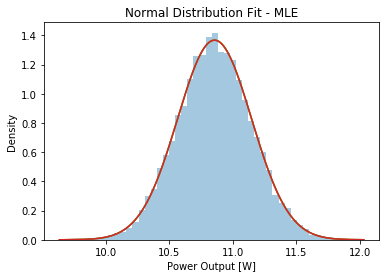

In [28]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_1))
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_2))
norm_fit.set_title('Normal Distribution Fit - MLE')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Normal.png')

**Gamma plot**

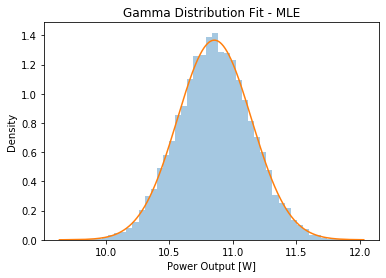

In [11]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MLE')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Gamma.png')

**Beta plot**

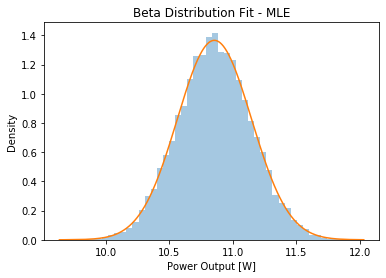

In [12]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MLE')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Beta.png')

**Uniform plot**

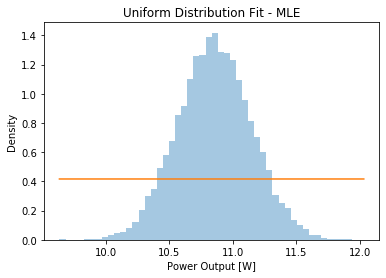

In [13]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MLE')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Uniform.png')

**Lognormal plot**

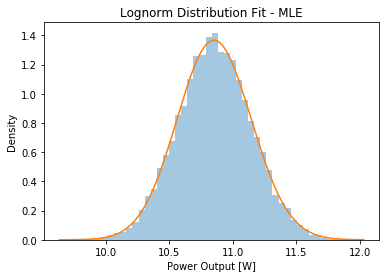

In [14]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MLE')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Lognorm.png')

**Model A:** Normal Distribution

**Model B:** Beta Distribution

### Non-Nested Likelihood Ratio Test

Compare **Model A** to **Model B** and choose the best fit. 

In [35]:

n_sim = 20000 

In [16]:
#sampling_dist = getattr(scipy.stats, dist_A)
#dataset = sampling_dist.rvs(*param, size = n_sim)
#scipy.stats.lognorm.rvs(*params_lognorm, size = 1000)

In [36]:
from helper_functions import LRT

Q, Q_array, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

Select model A


In [54]:
a = Q_array > Q


print(f"p_value = {p_value}")
print('we fail to reject the null hypothesis')

p_value = 0.647
we fail to reject the null hypothesis


In [56]:
Q, Q_array, qQi = LRT(results.iloc[:2], 100, 10000)

NameError: name 'Q_arrray' is not defined

In [75]:
best_fits = results_test[:4]
best_fits

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."
6,gamma,-3751.963996,1.0,"(28532.084433159544, -38.45065752075047, 0.001..."
8,lognorm,-3752.687748,2.0,"(0.010872404014110125, -16.003623600716686, 26..."


In [102]:
best_fits.iloc[0]['Distribution']

'norm'

In [103]:
# best fitted distribution information
null = []
alternative = []
p_values = []
for i in range(best_fits.shape[1]):
    for j in range(best_fits.shape[1]):
        if i<j:
            null.append(best_fits.iloc[i]['Distribution'])
            alternative.append(best_fits.iloc[j]['Distribution'])
            p_values.append(LRT(best_fits.iloc[[i, j],:]))

LRT_dataframe = pd.DataFrame()
LRT_dataframe['Null'] = null
LRT_dataframe['Alternative'] = alternative
LRT_dataframe['p_values'] = p_values

TypeError: LRT() missing 2 required positional arguments: 'n_datasets' and 'n_sim'

In [ ]:
"""
def p_value_LRT(dist_A, dist_B, ...):
    pass
    
def given_df_doit_forany_pair(dataframe, ...):
    pass
"""

In [80]:
for dist in best_fits['Distribution']:
    print(dist)

norm
beta
gamma
lognorm


In [73]:
for row in best_fits.itertuples():
    dist = row[1]
    ll = row[2]
    pars = row[4]
    print(dist, ll, pars)

norm -3752.1989807498094 (10.856260930361984, 0.2919045002438211)
beta -3751.9400786272727 (364.87933577547363, 431.3367243552041, 3.2758077228036275, 16.54157441896509)
gamma -3751.963996110023 (28532.084433159544, -38.45065752075047, 0.0017281219025688426)
lognorm -3752.6877477593744 (0.010872404014110125, -16.003623600716686, 26.85801472349138)


In [96]:
test = best_fits.iloc[[0,1],:]


,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."


In [107]:
p1, p2 = LRT(results.iloc[:2], 100, 10000)

In [109]:
p2

0.61

In [110]:
def LRT(best_options, n_datasets, n_sim):
    """
    Docs: 
    - best_options: so far is a dataframe
    - n_datasets: number of datasets S to simulate from the best estimate
    - n_sim: how many observations to simulate for each dataset
    """
    # Null Model
    dist_A = getattr(scipy.stats, best_options.iloc[0]['Distribution'])
    ll_A = best_options.iloc[0]['Log_likelihood']
    param = best_options.iloc[0]['Parameters']
    
    # Alternative Model
    dist_B = getattr(scipy.stats, best_options.iloc[1]['Distribution'])
    ll_B = best_options.iloc[1]['Log_likelihood']
    
    # LRT Statistic
    Q = 2 * (ll_B - ll_A)
    
    #P value counter
    p_value_counter = 0
    
    for i in range(n_datasets):
        # Generate dataset
        dataset = dist_A.rvs(*param, size = n_sim)
        
        # Fit models
        param_A_i = dist_A.fit(dataset)
        ll_A_i = np.sum(np.log(dist_A.pdf(dataset, *param_A_i)))

        param_B_i = dist_B.fit(dataset)
        ll_B_i = np.sum(np.log(dist_B.pdf(dataset, *param_B_i)))
        
        # Compute Qi
        Q_i = 2 * (ll_B_i - ll_A_i)
        #Q_array[i] = Q_i 
        
        if Q_i > Q:
            p_value_counter += 1
    
    #Quantile_Q = np.quantile(Q_array, 0.95)
    #p_value_1 = np.sum(Q_array>Q)/n_datasets
    p_value = p_value_counter / n_datasets

    return p_value

### Q-Q Plot

Compare **Model A** to **Model B** on a quantile-quantile plot. 

In [ ]:
from helper_functions import qqplot

qqplot(simulation, results)

### Chosen Model Description

In [ ]:
best_name = results.iloc[0]['Distribution']
best_params = results.iloc[0]['Parameters']

best_dist = getattr(scipy.stats, best_name)

## Plot Choosen Model Againts Data

In [ ]:
import seaborn as sns

**Simulated Data Histogram**

In [ ]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
sns.kdeplot(data = simulation, shade= False)

**Chosen Distribution Density Function**

In [ ]:
simulation.sort()

**Chosen Distribution on top of Simulated Data Histogram**

In [ ]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, best_dist.pdf(simulation, *best_params))

In [ ]:
beta_name = results.iloc[1]['Distribution']
beta_params = results.iloc[1]['Parameters']

beta_dist = getattr(scipy.stats, beta_name)

sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, beta_dist.pdf(simulation, *beta_params))

## Validation Methods

### Kolmogorov-Smirnoff 2 Sample Test

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
data2 = best_dist.rvs(*best_params, size = 2000)
statistic, pvalue = ks_2samp(data,data2)
print(f"The Statistic value is: {statistic} \nThe p_value is: {pvalue}")

In [ ]:
n1 = len(data1)
n2 = len(data2)
alpha = 0.05
c_alpha = 1.36 # https://sparky.rice.edu//astr360/kstest.pdf
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

In [ ]:
if statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

## Work Within Limits

### Quantiles

In [ ]:
quantiles = best_dist.ppf([0.0001, 0.5, 0.9999], *best_params)
quantiles

**Improvement**

In [ ]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
print(f'min: {limit_min}\nMax: {limit_MAX}\n')
(limit_MAX-limit_min)/limit_MAX
percent = ((quantiles[2]-quantiles[0])-(quantiles[2]-quantiles[1]))/limit_MAX*100

print(f'{percent}% narrower')

### Cp

In [ ]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

In [ ]:
# This value depends on the best distribution
sigma = best_params[1]

In [ ]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp